In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [50]:
path_aut = ('/content/drive/MyDrive/Autism.csv')

In [21]:
df = pd.read_csv(path_aut)
print(df.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         0         0         1         1         0   
1         1         1         0         0         1         1         0   
2         1         1         0         0         0         1         1   
3         0         1         0         0         1         1         0   
4         1         1         1         1         1         1         1   

   A8_Score  A9_Score  A10_Score  ...  gender        ethnicity jundice austim  \
0         1         0          0  ...       m           Others      no     no   
1         1         0          0  ...       m  Middle Eastern       no     no   
2         1         0          0  ...       m                ?      no     no   
3         0         0          1  ...       f                ?     yes     no   
4         1         1          1  ...       m           Others     yes     no   

   contry_of_res used_app_before result    age_desc relation C

In [51]:
# Now let’s check the size of the dataset.
df.shape

(1100, 24)

In [52]:
df.dtypes

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender               int64
ethnicity            int64
jundice              int64
austim               int64
contry_of_res        int64
used_app_before      int64
result             float64
age_desc             int64
relation             int64
Class/ASD            int64
ageGroup             int64
sum_score            int64
ind                  int64
dtype: object

In [24]:
df.isna().sum()
df['result'] = df['result'].astype(float)
df['age'] = df['age'].astype(float)

As per the above information regarding the data in each column we can observe that there are no null values.

In [53]:
df.dropna()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,ageGroup,sum_score,ind
0,1,1,0,0,1,1,0,1,0,0,...,0,48,0,5.0,3,2,0,0,5,0
1,1,1,0,0,1,1,0,1,0,0,...,0,48,0,5.0,3,2,0,0,5,0
2,1,1,0,0,0,1,1,1,0,0,...,0,48,1,5.0,3,1,0,0,5,1
3,0,1,0,0,1,1,0,0,0,1,...,0,48,0,4.0,3,1,0,0,4,1
4,1,1,1,1,1,1,1,1,1,1,...,0,86,0,10.0,3,2,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,1,0,1,1,0,1,1,1,1,...,0,70,0,7.0,2,4,1,3,7,0
1096,1,0,0,0,0,0,0,1,0,1,...,0,56,0,3.0,2,2,0,3,3,0
1097,1,0,1,1,1,0,1,1,0,1,...,0,70,0,7.0,2,1,1,3,7,0
1098,1,0,0,1,1,0,1,0,1,1,...,0,65,0,6.0,2,4,0,3,6,0


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,1100.0,0.699091,0.458862,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,1100.0,0.482727,0.499929,0.000000,0.000000,0.000000,1.000000,1.000000
A3_Score,1100.0,0.551818,0.497534,0.000000,0.000000,1.000000,1.000000,1.000000
A4_Score,1100.0,0.530000,0.499326,0.000000,0.000000,1.000000,1.000000,1.000000
A5_Score,1100.0,0.587273,0.492548,0.000000,0.000000,1.000000,1.000000,1.000000
A6_Score,1100.0,0.443636,0.497039,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,1100.0,0.477273,0.499710,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,1100.0,0.605455,0.488975,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,1100.0,0.412727,0.492548,0.000000,0.000000,0.000000,1.000000,1.000000
A10_Score,1100.0,0.621818,0.485154,0.000000,0.000000,1.000000,1.000000,1.000000


Data Cleaning
The data which is obtained from the primary sources is termed the raw data and required a lot of preprocessing before we can derive any conclusions from it or to some modeling on it. Those preprocessing steps are known as data cleaning

In [55]:
df['ethnicity'].value_counts()

ethnicity
9    381
5    201
0    185
4    128
1     65
7     60
3     33
2     25
6     14
8      8
Name: count, dtype: int64

In the above two outputs we can observe some ambiguity that there are ‘?’, ‘others’, and ‘Others’ which all must be the same as they are unknown or we can say that null values have been substituted with some indicator.

In [56]:
df['relation'].value_counts()

relation
4    571
2    300
1    152
3     53
0     23
5      1
Name: count, dtype: int64

The same is the case with this column so, let’s clean this data, and along with this let’s convert ‘yes’ and ‘no’ to 0 and 1.

In [57]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

Now we have cleaned the data a bit to derive insights from it.



Exploratory Data Analysis

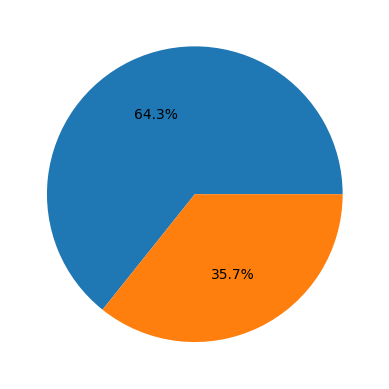

In [58]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

The dataset we have is highly imbalanced. If we will train our model using this data then the model will face a hard time predicting the positive class which is our main objective here to predict whether a person has autism or not with high accuracy.

In [59]:
ints = []
objects = []
floats = []

for col in df.columns:
	if df[col].dtype == int:
		ints.append(col)
	elif df[col].dtype == object:
		objects.append(col)
	else:
		floats.append(col)

Now, we have columns segregated based on the type of data they contain hence now we’ll be able to perform suitable analysis depending upon the type of data.

In [29]:
df['Class/ASD'] = df['Class/ASD'].replace({'YES': 1, 'NO': 0})

The ‘ID’ column will contain a unique value for each of the rows and for the column ‘Class/ASD’ we have already analyzed its distribution so, that is why they have been removed in the above code.



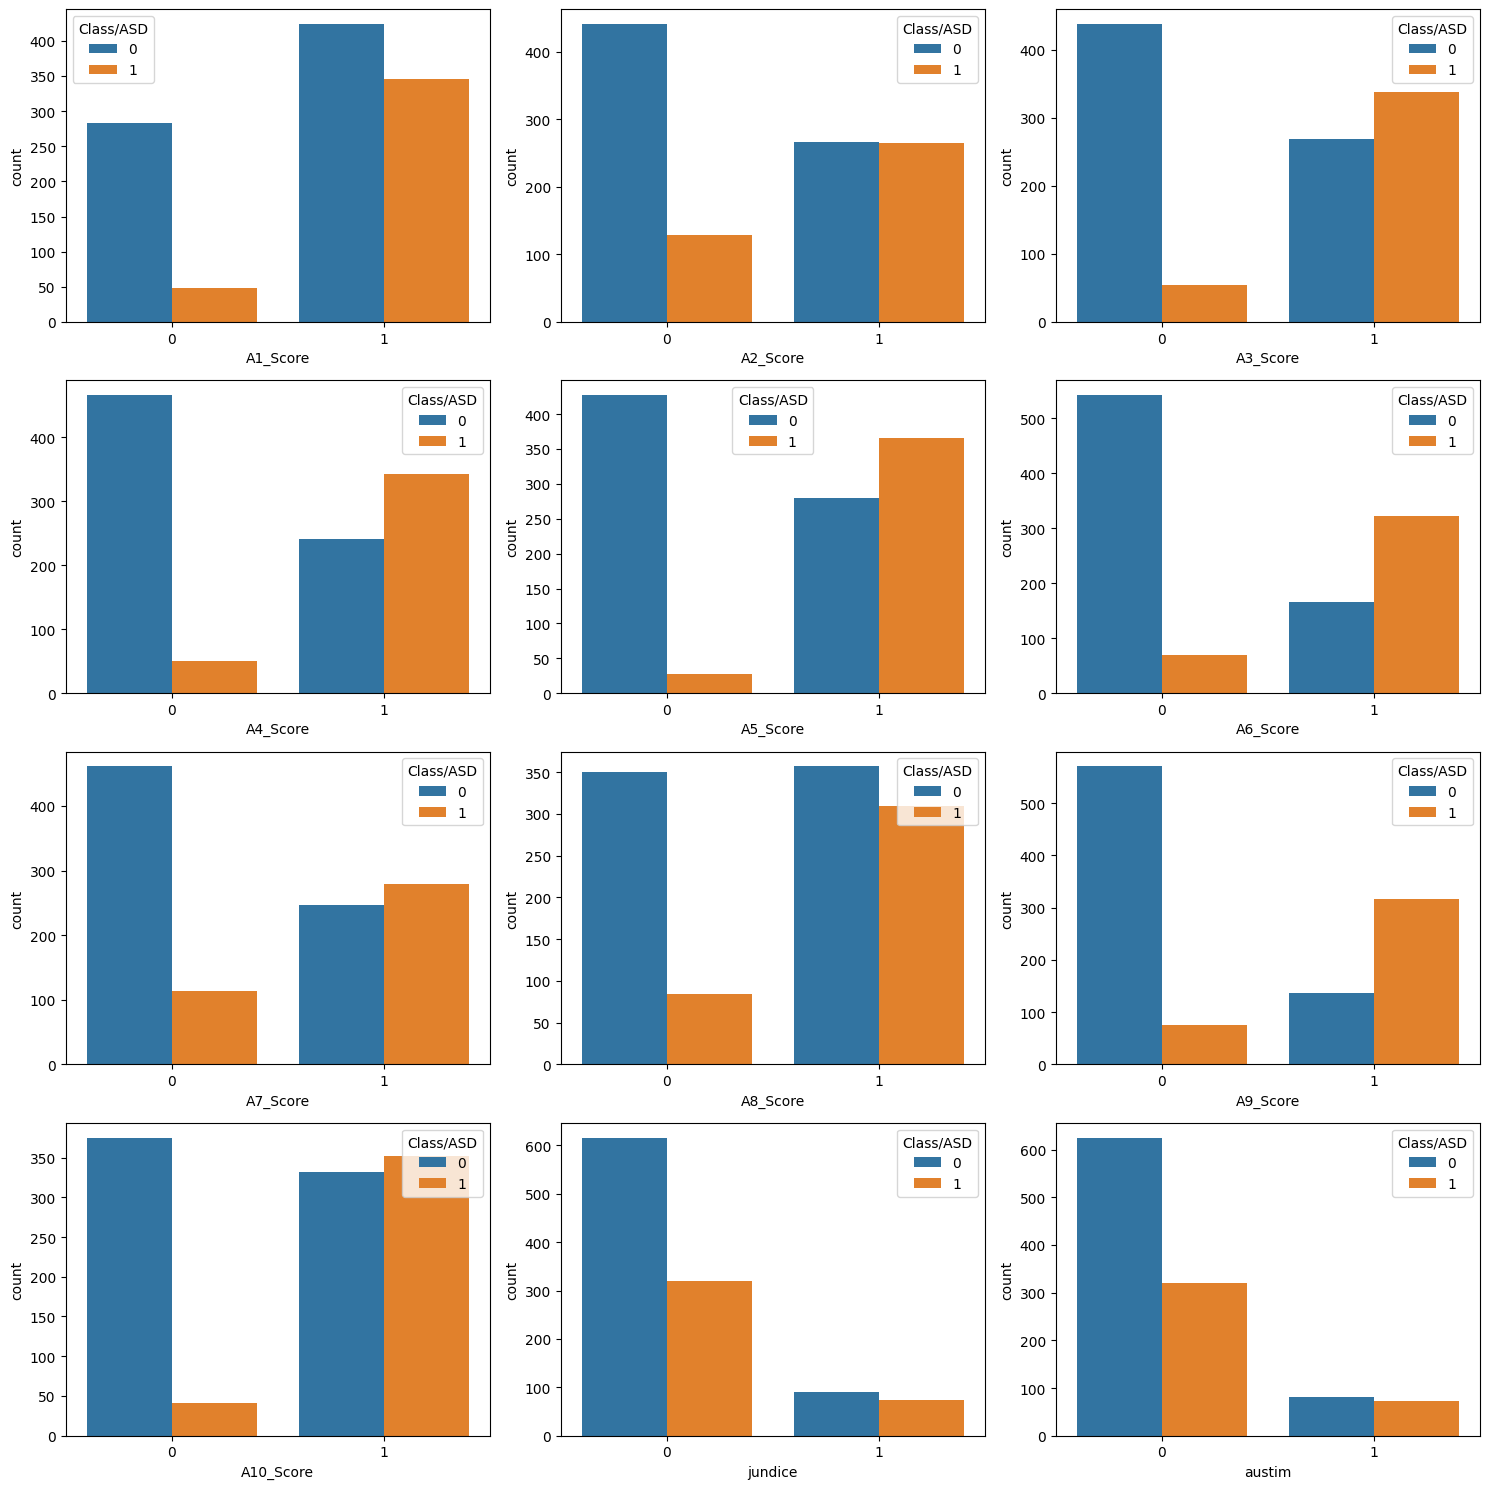

In [30]:
plt.subplots(figsize=(15,15))

for i in range(1, 13):
  col = ints[i-1]
  plt.subplot(4,3,i)
  sns.countplot(data = df, x = col, hue = 'Class/ASD')
plt.tight_layout()
plt.show()

From these plots, we can conclude that if the score of some indicator is 0 then the chances of that person not having autism is quite high except in the case of A10_Score.

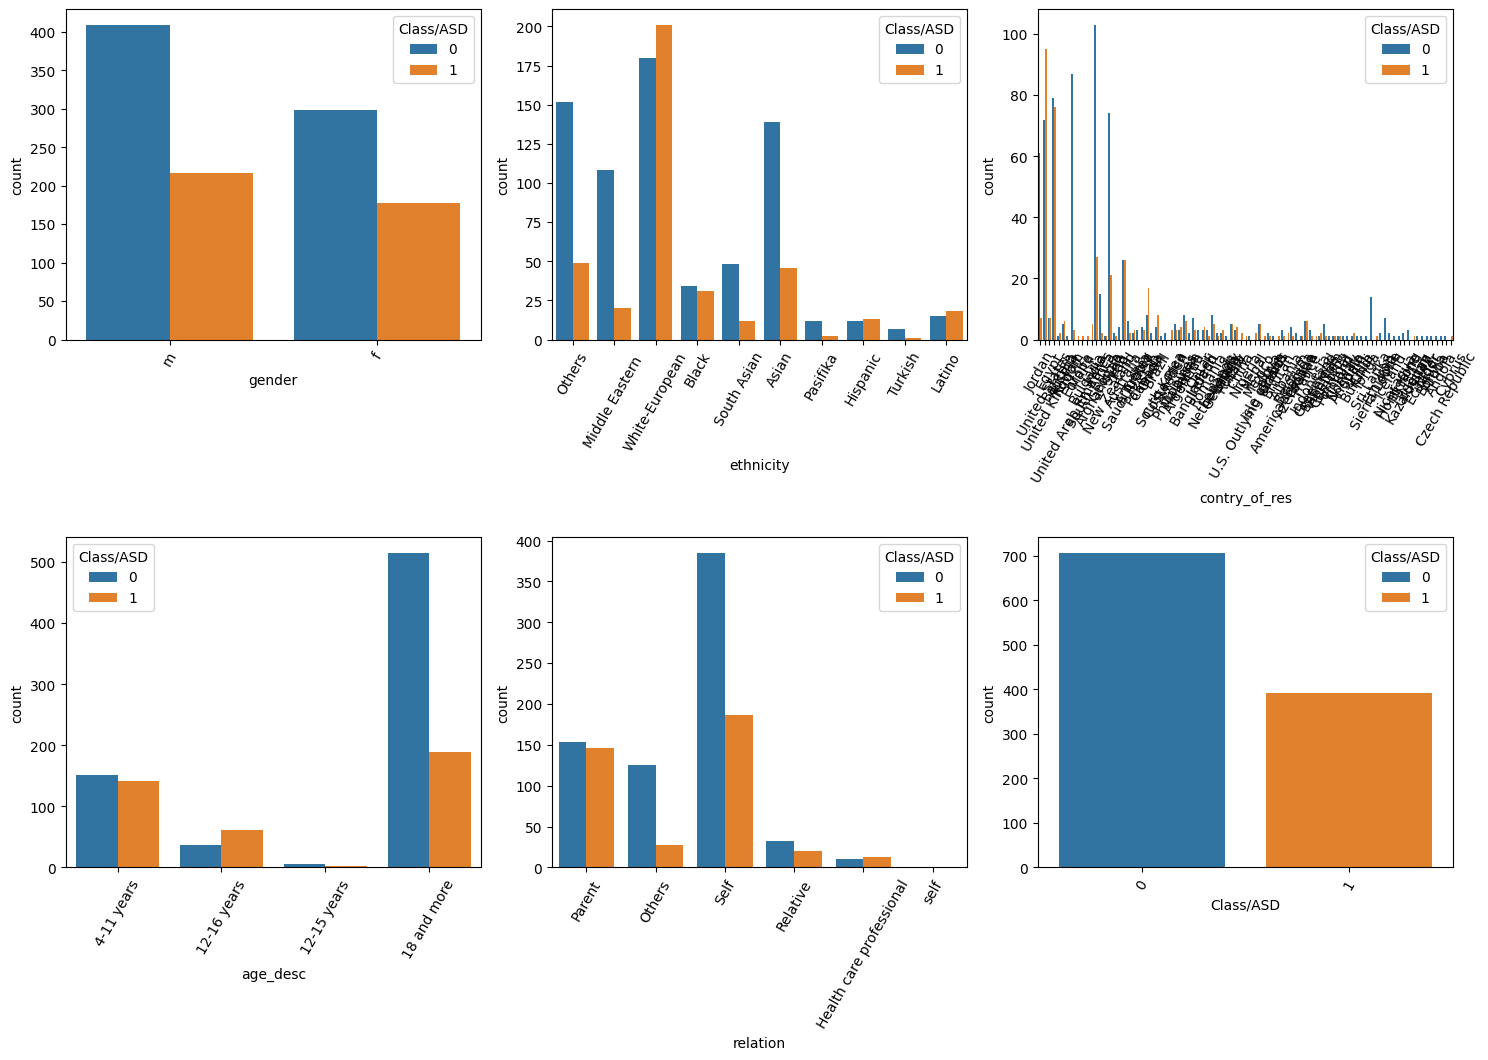

In [31]:
plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
	plt.subplot(6, 3, i+1)
	sns.countplot(data = df, x = col, hue = 'Class/ASD')
	plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

From the above plots we can draw the following observations:

Age_desc is the same for all the data points.
This used_app_before feature doesn’t seem to be useful or it will be the source of data leakage.
Here it seems like the chances of a male having autism is higher than a female but that is not true because we don’t have an equal number of examples of males and females.

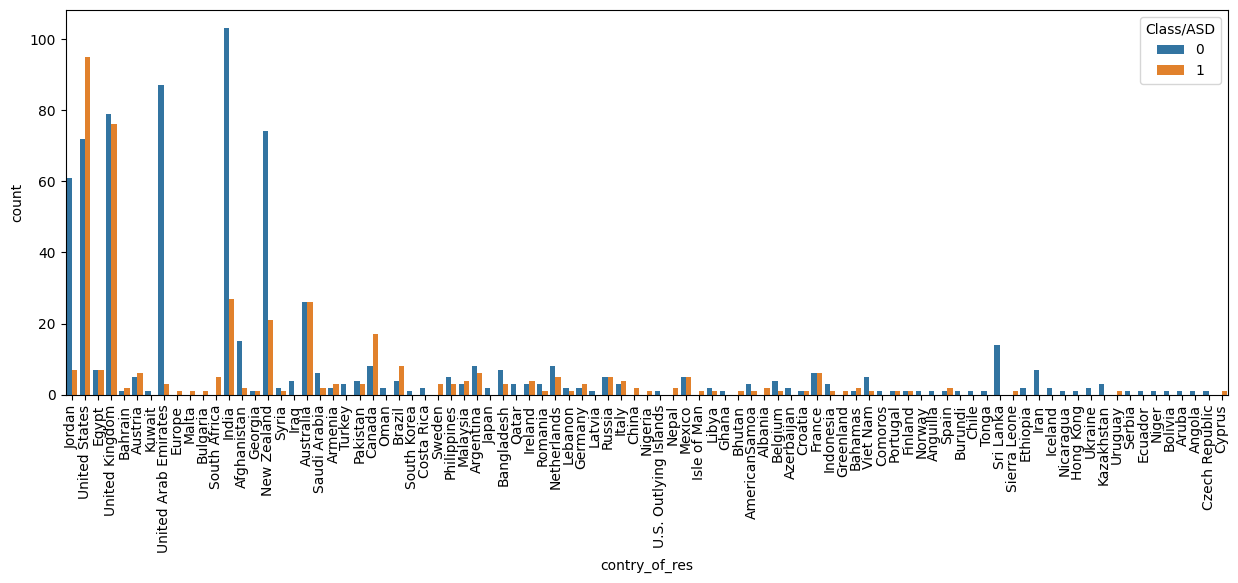

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

In some places approximately 50% of the data available for that country have autism and in some places, this is quite low. This implies that the geography of a person also gives an idea of having autism.

In [60]:
df['result'] = df['result'].astype(float)
df['age'] = df['age'].astype(float)
df.dtypes

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender               int64
ethnicity            int64
jundice              int64
austim               int64
contry_of_res        int64
used_app_before      int64
result             float64
age_desc             int64
relation             int64
Class/ASD            int64
ageGroup             int64
sum_score            int64
ind                  int64
dtype: object

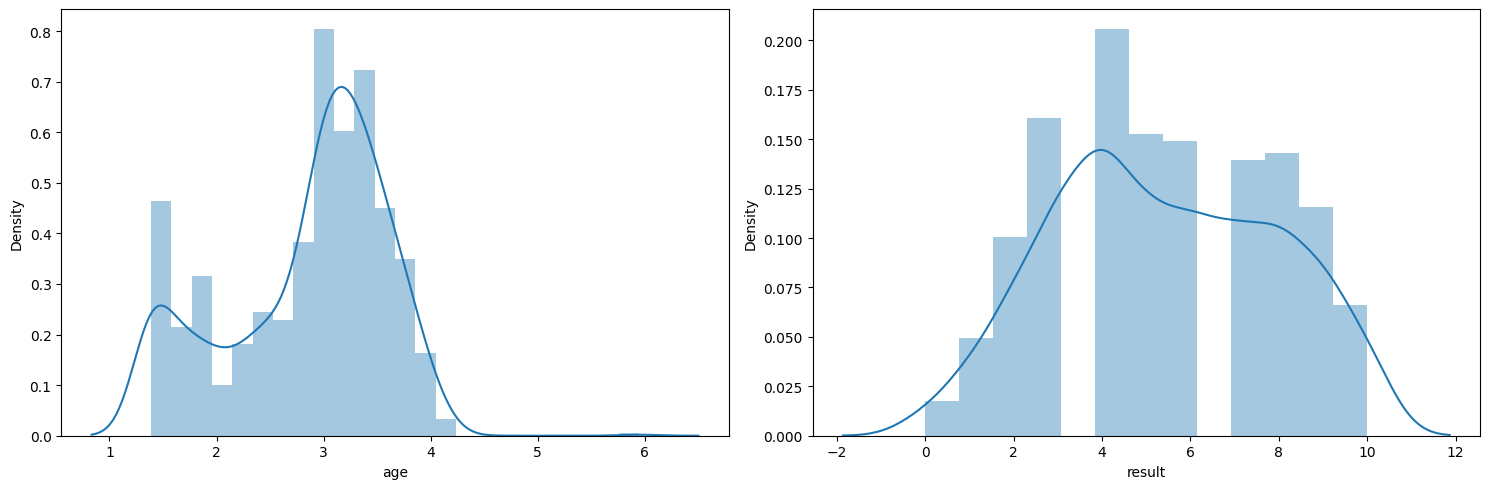

In [61]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

The continuous data are skewed left one is positive

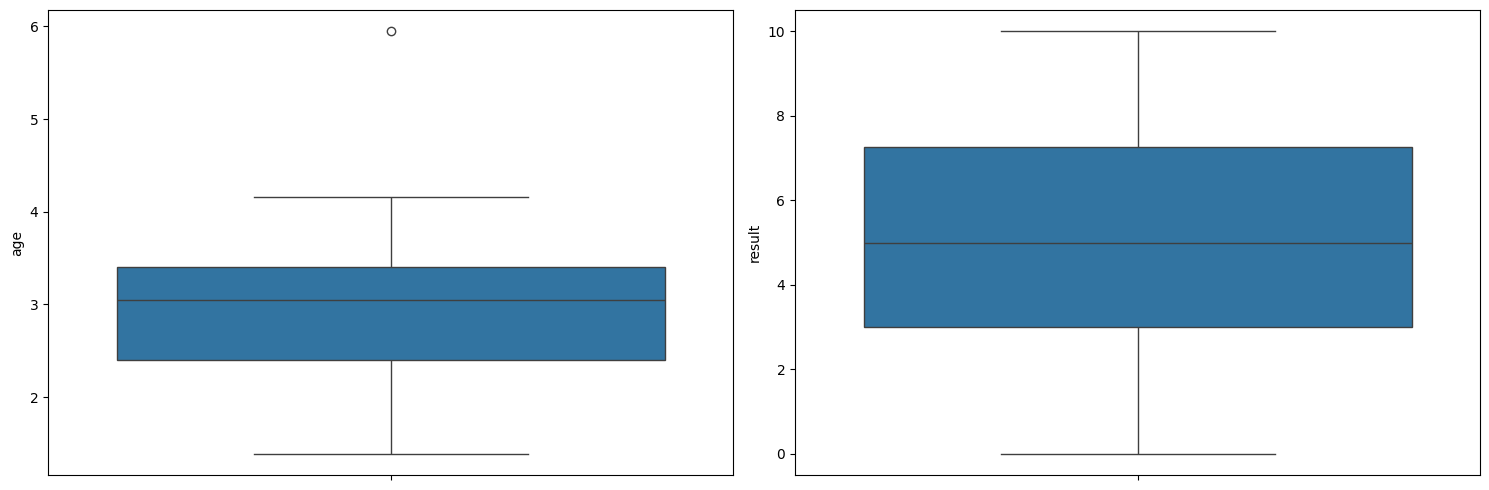

In [62]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

Feature Engineering

In [ ]:
#@title Feature Engineering

In [63]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)

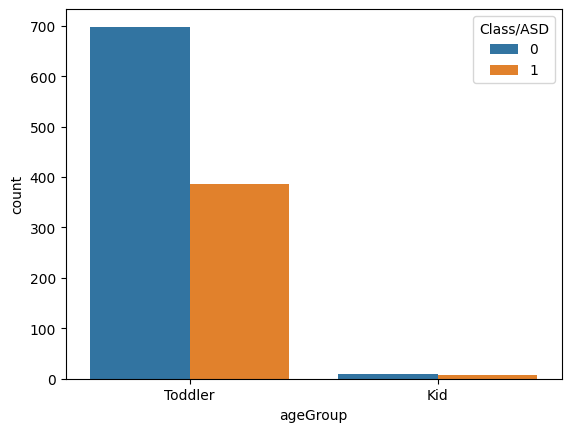

In [64]:
#number of cases for each age group.
sns.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

Here we can conclude that the Young  group of people have lower chances of having Autism.

In [65]:
def add_feature(data):

# Creating a column with all values zero
	data['sum_score'] = 0
	for col in data.loc[:,'A1_Score':'A10_Score'].columns:

	# Updating the 'sum_score' value with scores
	# from A1 to A10
		data['sum_score'] += data[col]

# Creating a random data using the below three columns
	data['ind'] = data['austim'] + data['used_app_before'] + data['jundice']

	return data

df = add_feature(df)

In the above code block, we have just summed up the clinical scores given from A1 to A10.

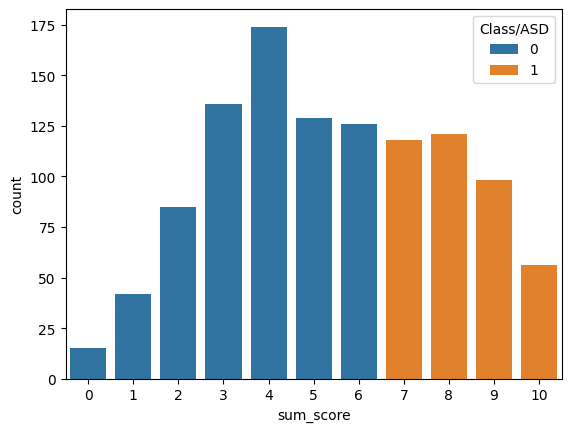

In [66]:
sns.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

Another amazing observation higher the sum score higher the chances of having autism is higher as well and similarly for lower sum scores that are for less than 5 it is rare that the person has autism.

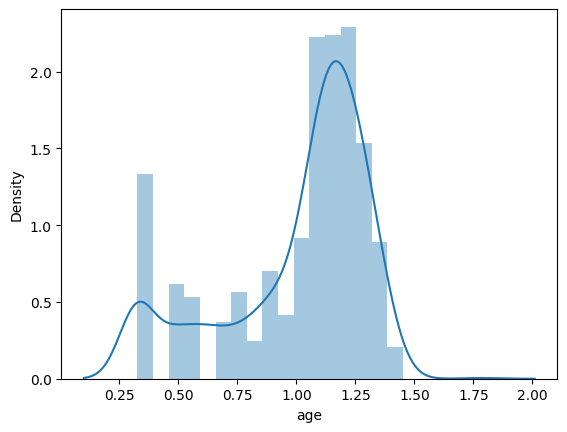

In [67]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))


sns.distplot(df['age'])
plt.show()


Now, the skewness of the data has been removed successfully by using the log transformations.

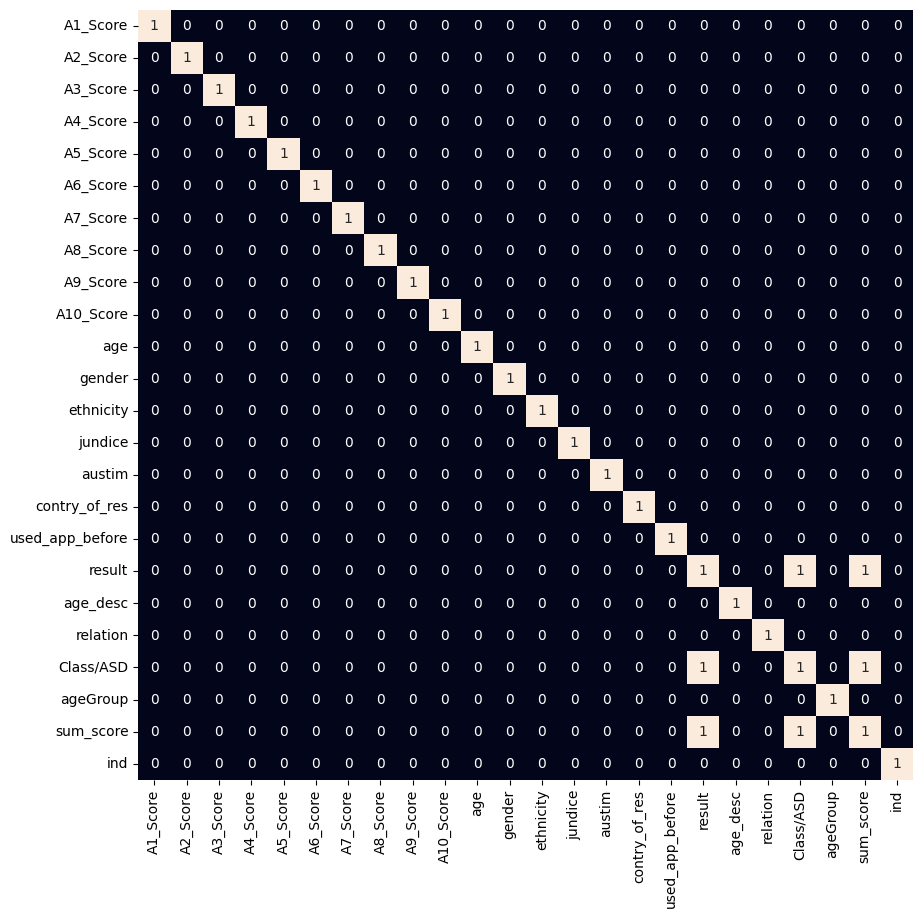

In [68]:
def encode_labels(data):
	for col in data.columns:

	# Here we will check if datatype
	# is object then we will encode it
		if data[col].dtype == 'object':
			le = LabelEncoder()
			data[col] = le.fit_transform(data[col])

	return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

From the above heat map, we can see that there are none highly correlated features which we will remove before training the model on this data as highly correlated features do not help in learning useful patterns in the data.

In [ ]:
#@title Model Training


Now we will separate the features and target variables and split them into training and the testing data by using which we will select the model which is performing best on the validation data.

In [69]:
removal = ['age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

Let’s split the data into training and validation data.

In [70]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape

((1136, 20), (1136,))

Normalize the data to obtain stable and fast training.

In [71]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


Train machine learning models and compare them which fit better with our data.

In [72]:
# Import the HistGradientBoostingClassifier class
from sklearn.ensemble import HistGradientBoostingClassifier

# Create a HistGradientBoostingClassifier object
model = HistGradientBoostingClassifier()

# Train the model on the original data
model.fit(X, Y)

# Evaluate the model on the validation data
print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))

Validation Accuracy :  1.0


In [73]:
# Import the SimpleImputer class
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object to replace missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the training data
imputer.fit(X)

# Transform the training and validation data
X = imputer.transform(X)
X_val = imputer.transform(X_val)

# Train the LogisticRegression model on the imputed data
model = LogisticRegression()
model.fit(X, Y)

# Evaluate the model on the validation data
print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))

Validation Accuracy :  1.0


In [74]:
df = df.fillna(df.mean())
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()


LogisticRegression() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

SVC() : 
Training Accuracy :  1.0
Validation Accuracy :  0.9938271604938271



From the above accuracies, we can say that Logistic Regression and SVC() classifier perform better on the validation data with less difference between the validation and training data

In [ ]:
#@title Confusion Matrix


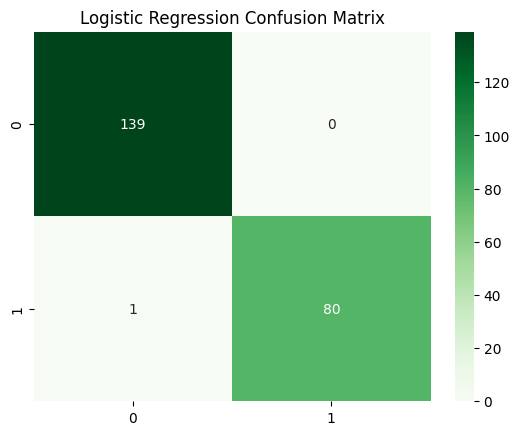

In [78]:
# Import the necessary modules
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
lg_cm = sklearn.metrics.confusion_matrix(Y_val, model.predict(X_val))

# Plot the confusion matrix
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lg_cm, annot=True, fmt="d", cmap="Greens")
plt.show()

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


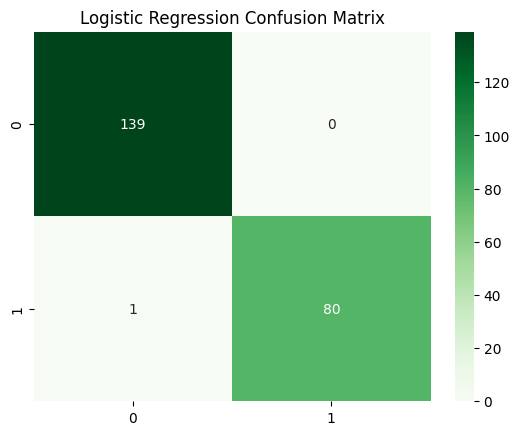

In [77]:
!pip install sklearn
import sklearn
#Confusion Matrix
#lg_cm = confusion_matrix(Y_val, model.predict(X_val))
lg_cm = sklearn.metrics.confusion_matrix(Y_val, model.predict(X_val))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lg_cm, annot=True, fmt="d", cmap="Greens")
plt.show()



#print("Logistic Regression Accuracy: ", accuracy_score(y_test, lg_pred))



The machine learning model we have created is around 80% to 85% accurate. The disease for which there are no diagnostics methods machine learning models are able to predict whether the person has Autism or not.